[Epoch 0/1000] [D loss: 0.709024] [G loss: 0.809885]


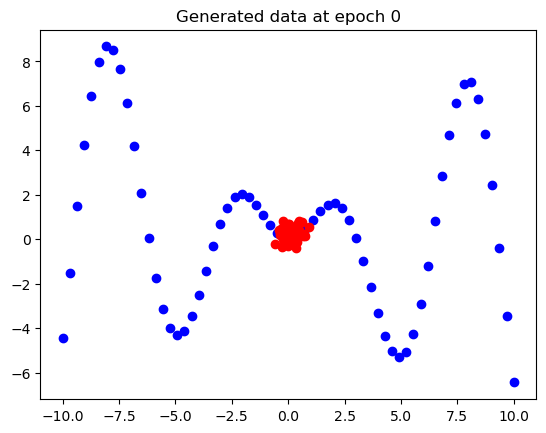

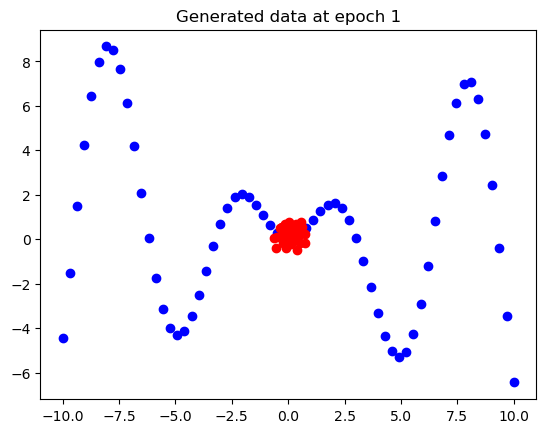

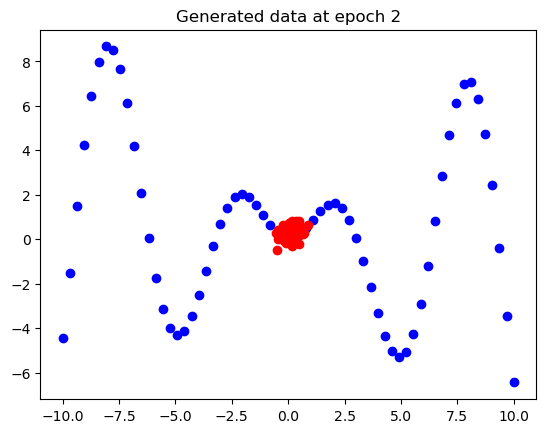

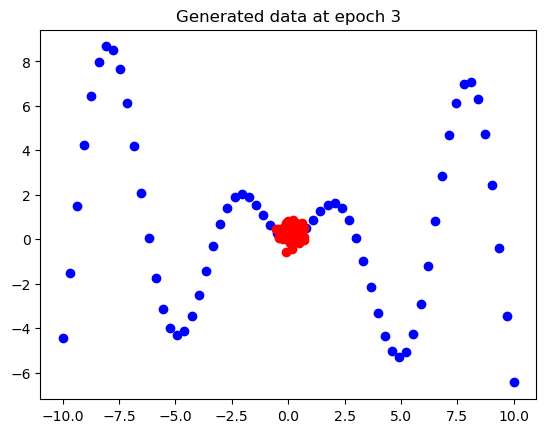

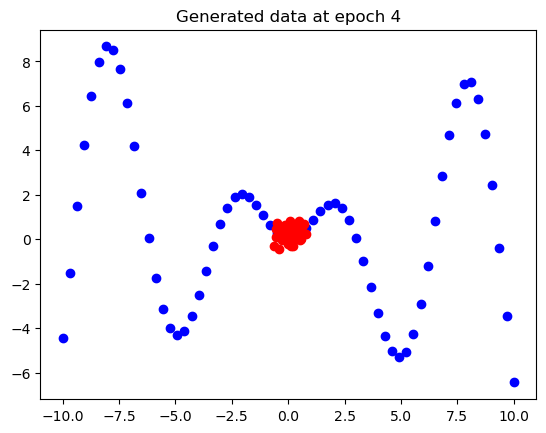

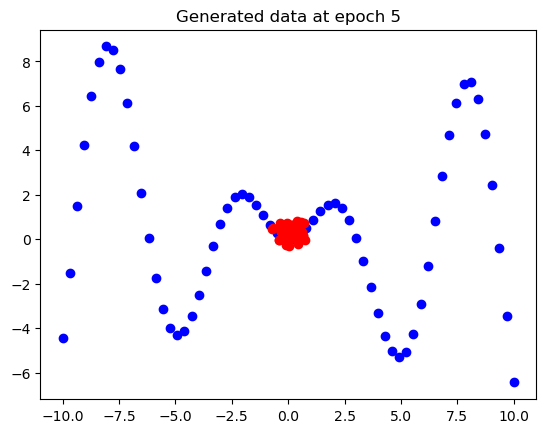

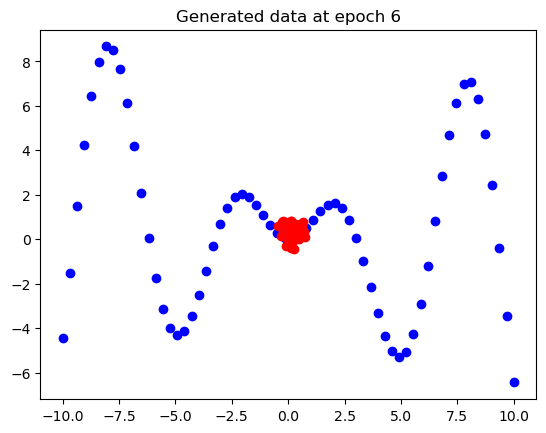

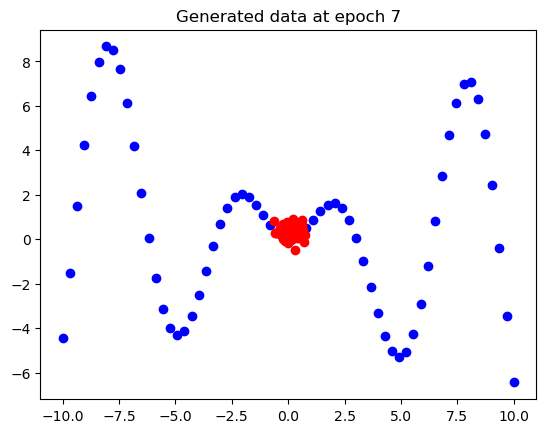

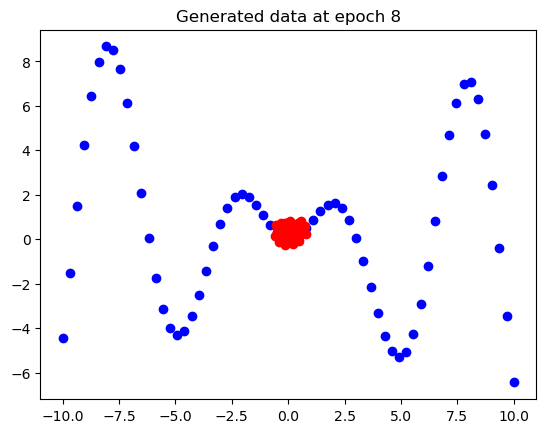

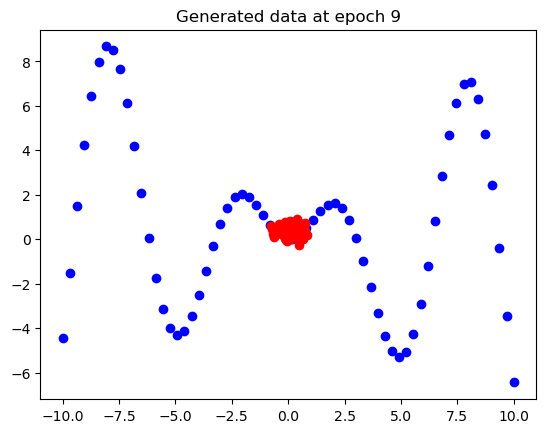

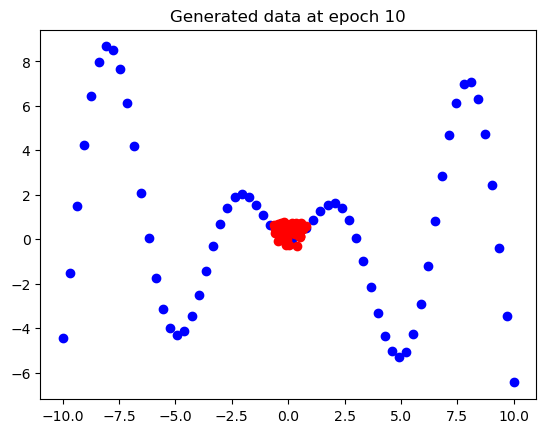

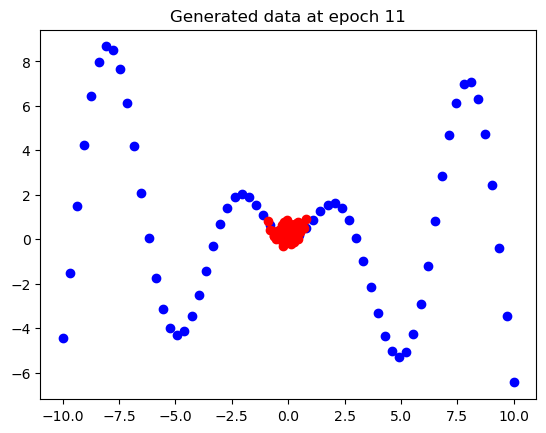

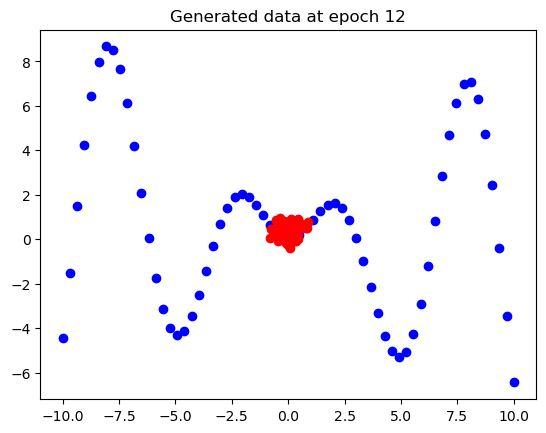

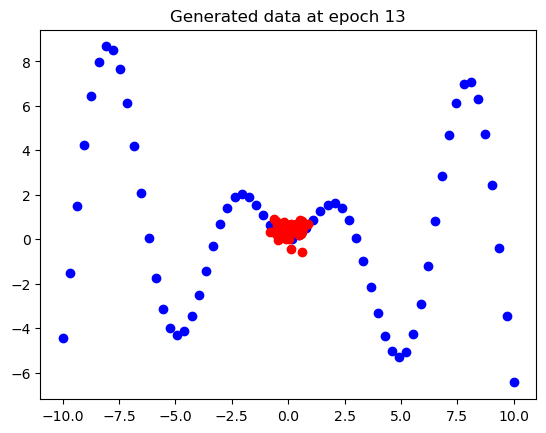

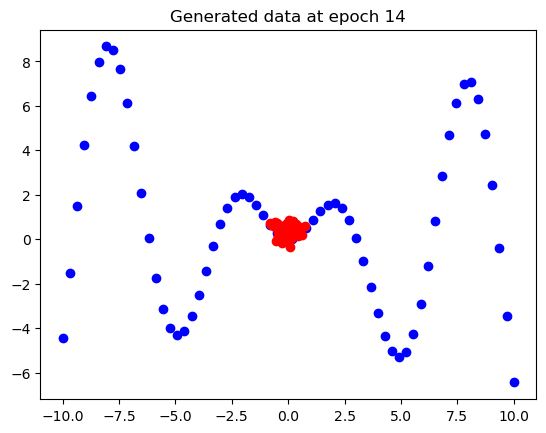

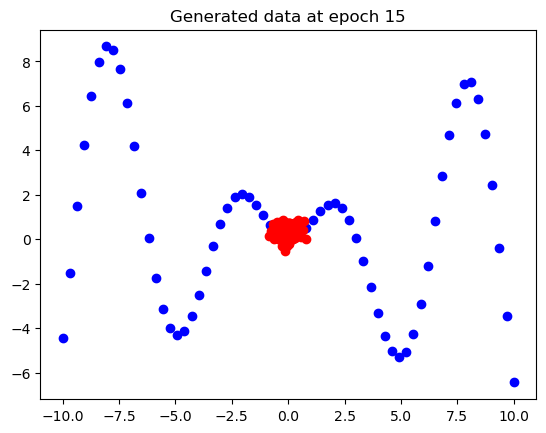

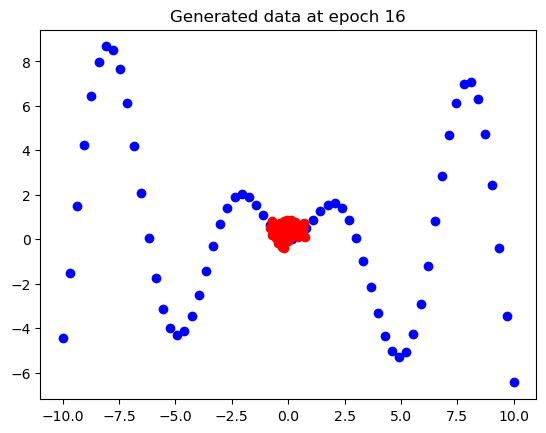

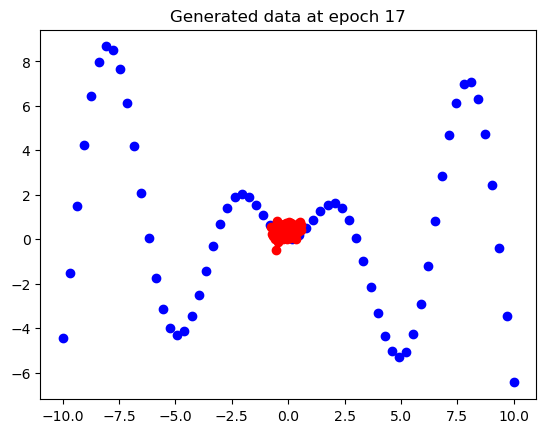

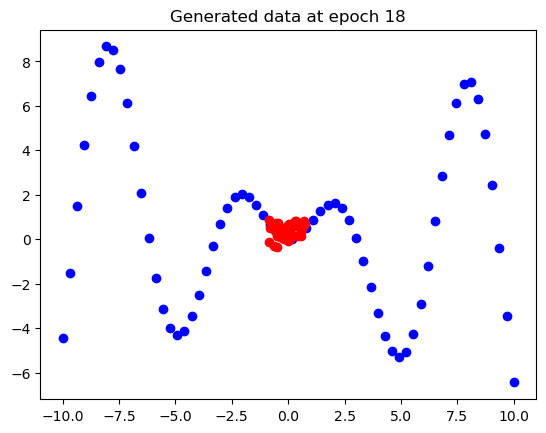

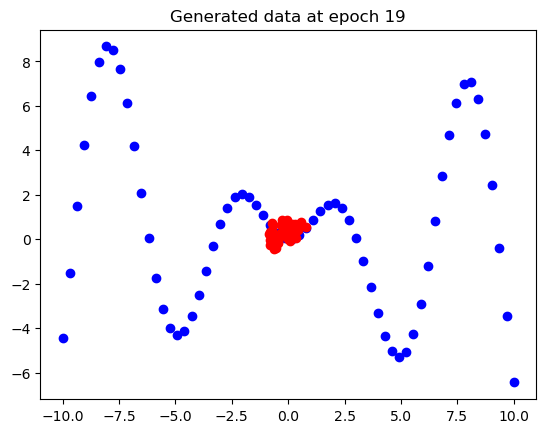

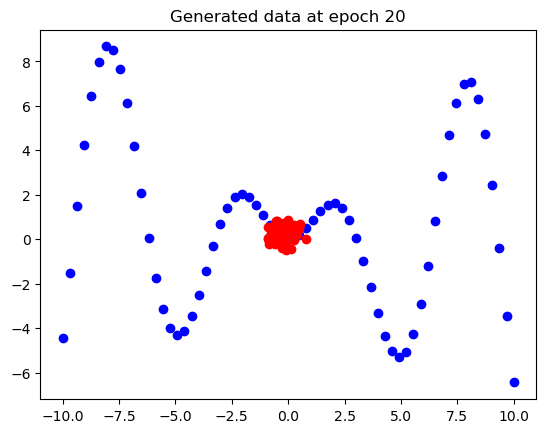

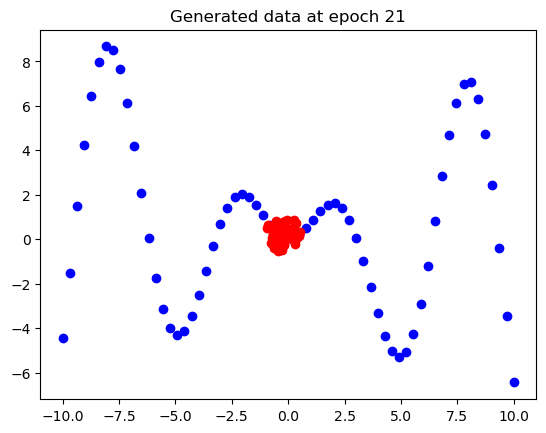

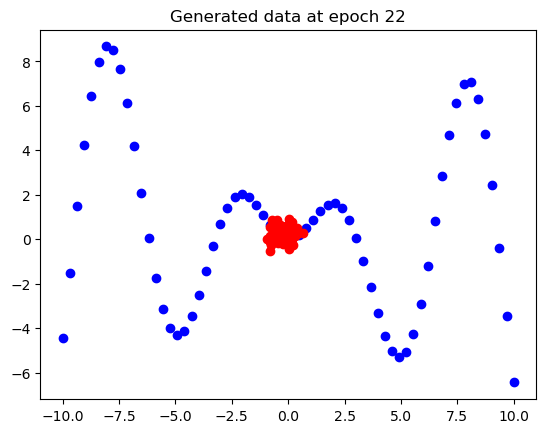

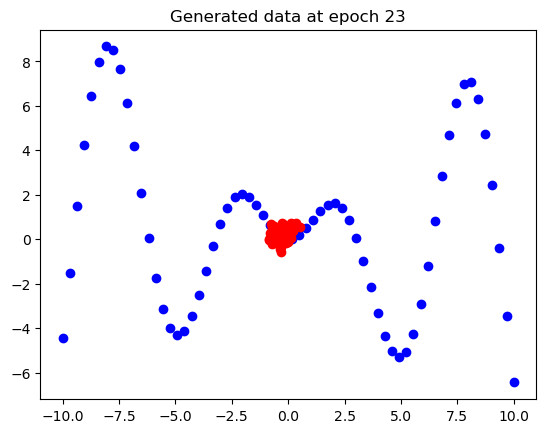

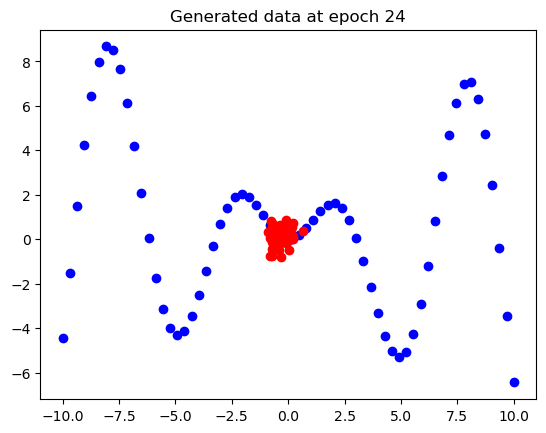

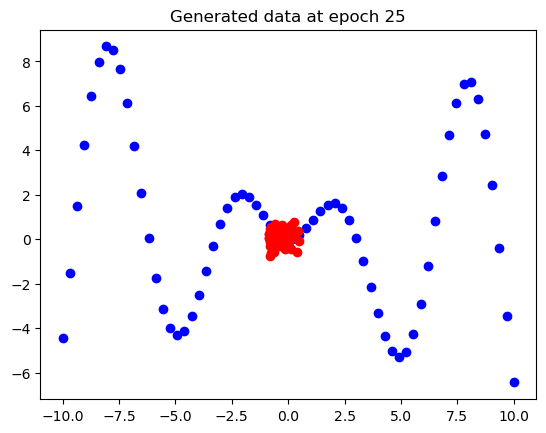

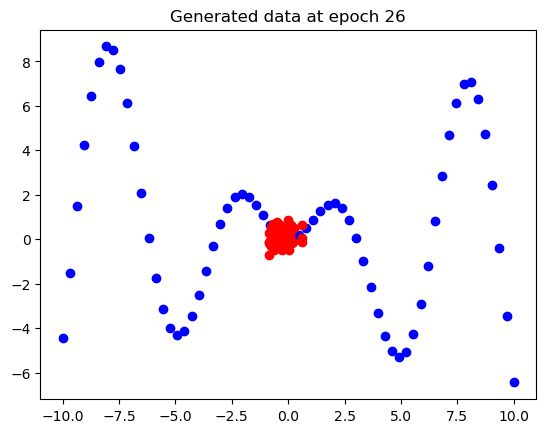

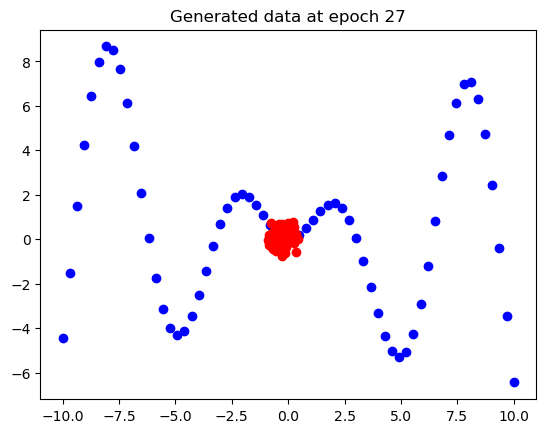

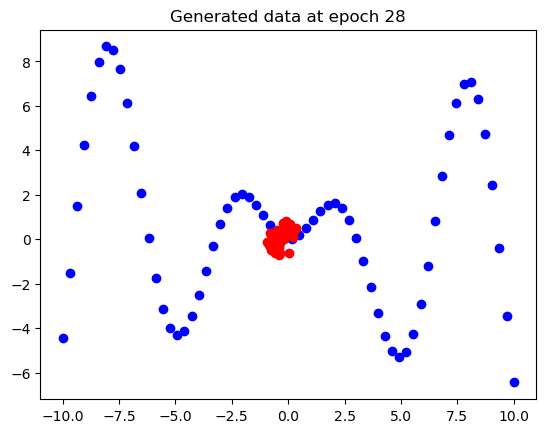

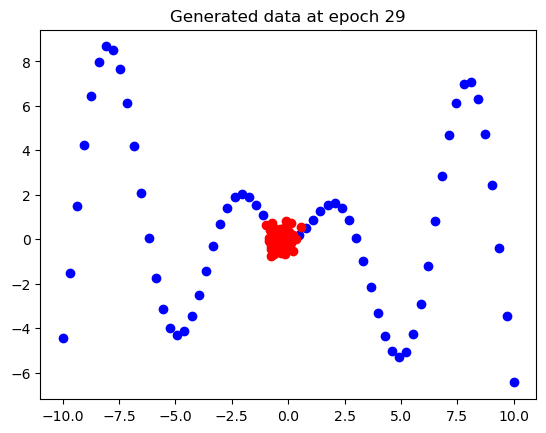

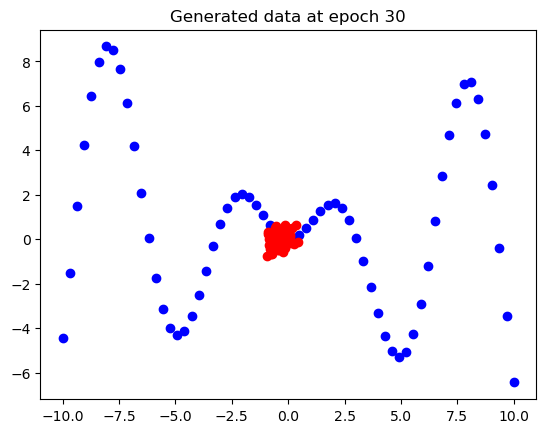

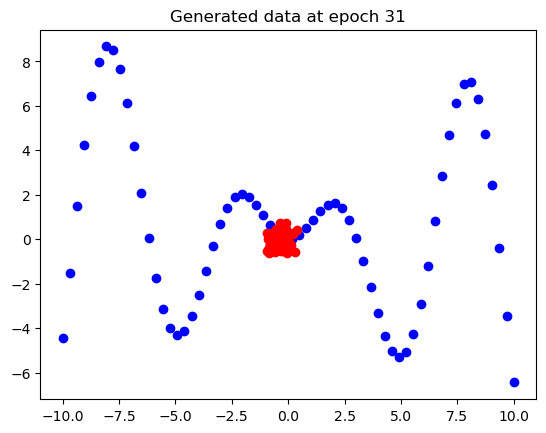

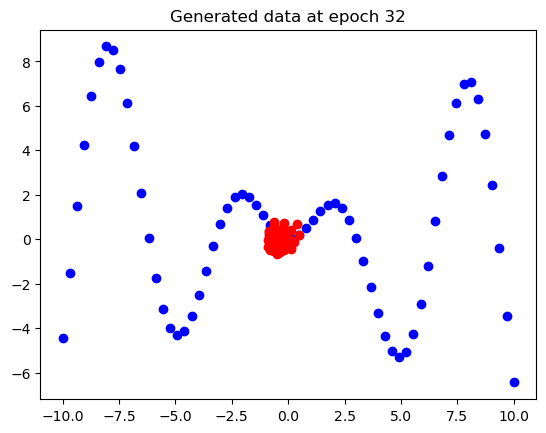

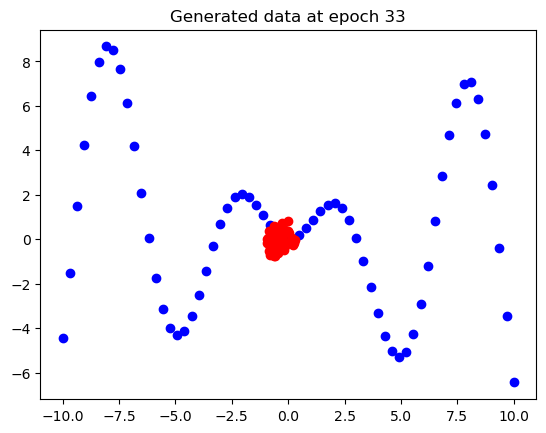

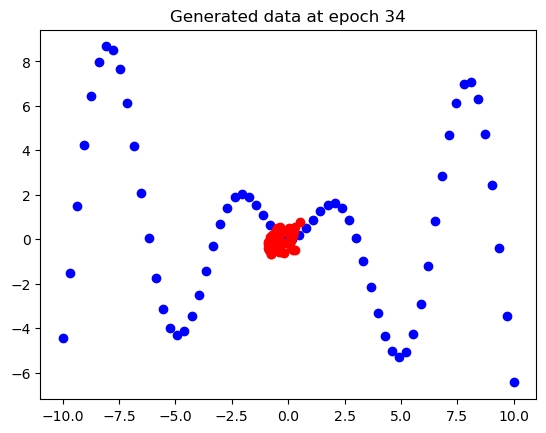

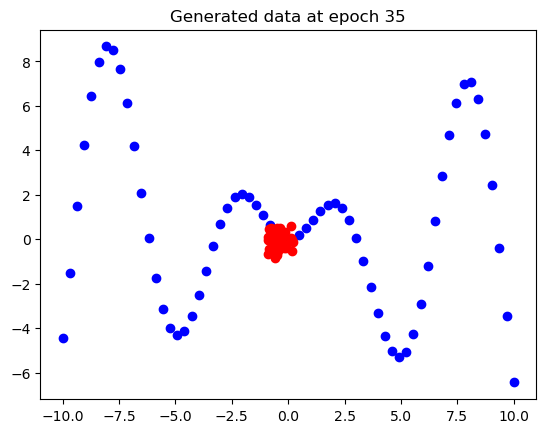

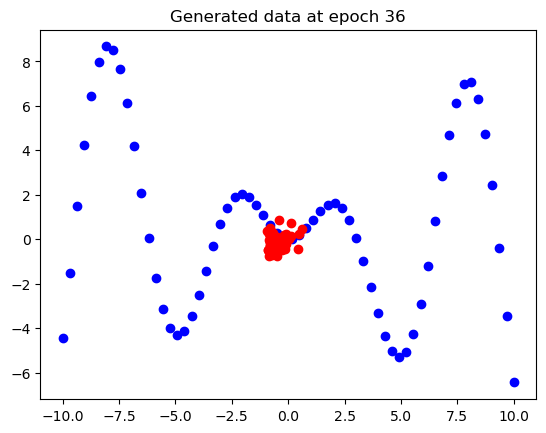

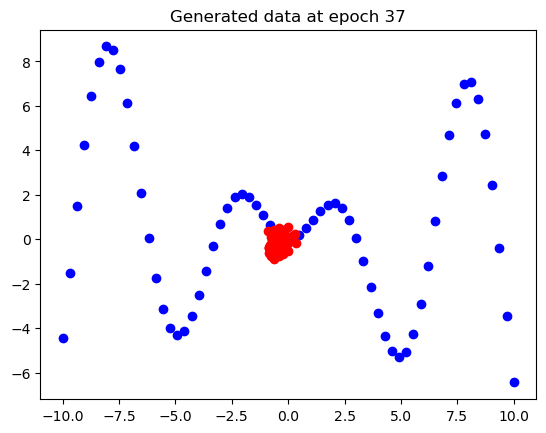

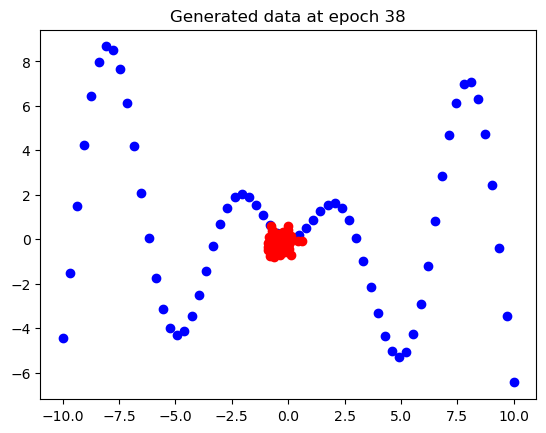

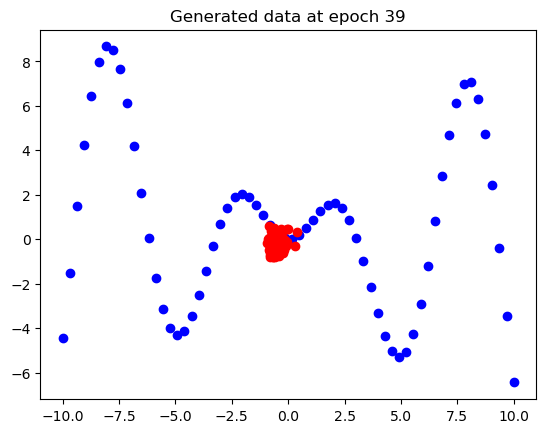

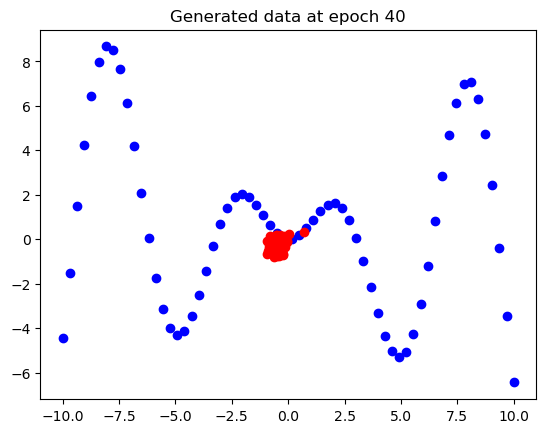

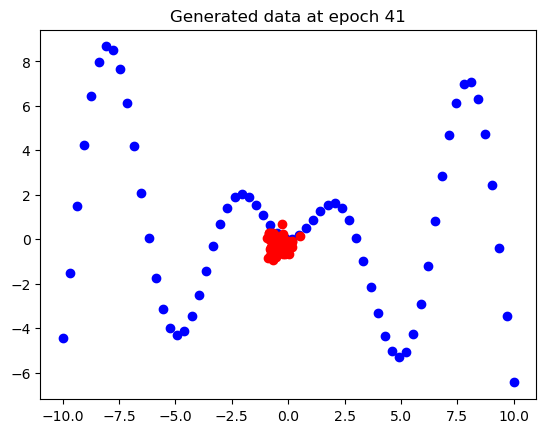

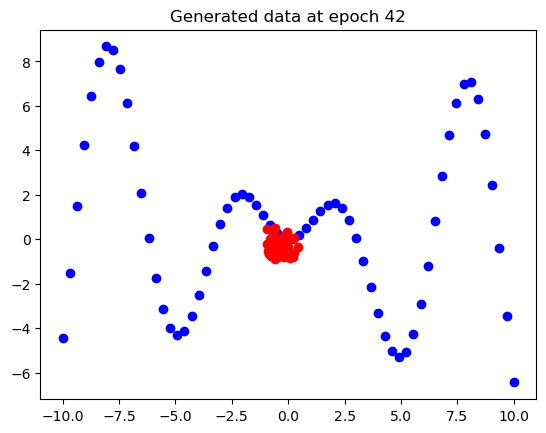

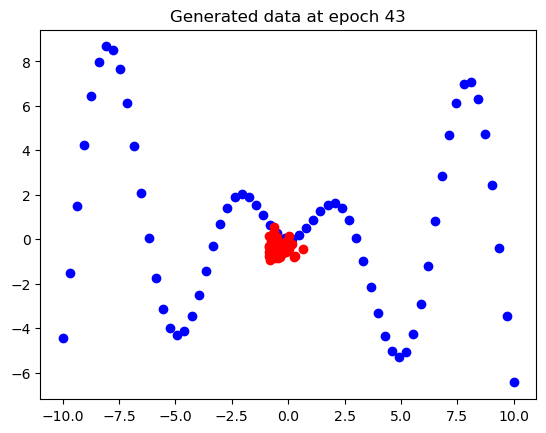

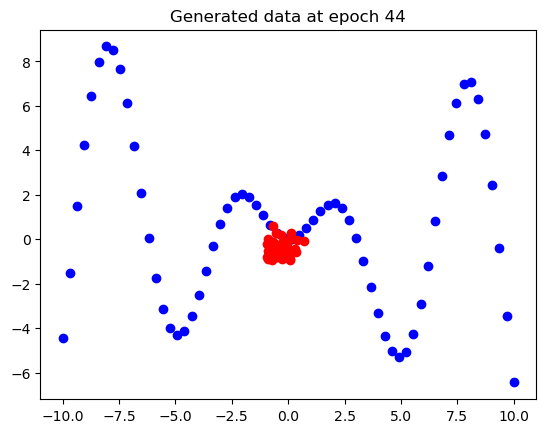

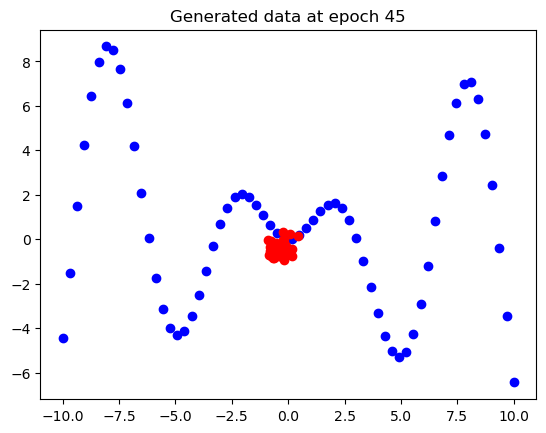

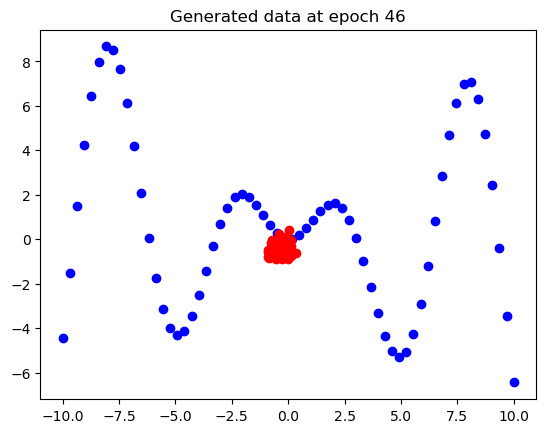

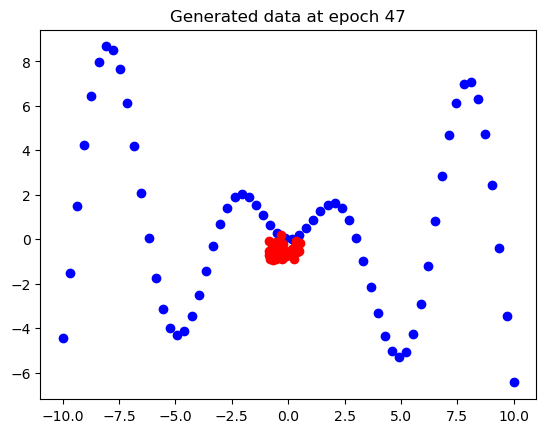

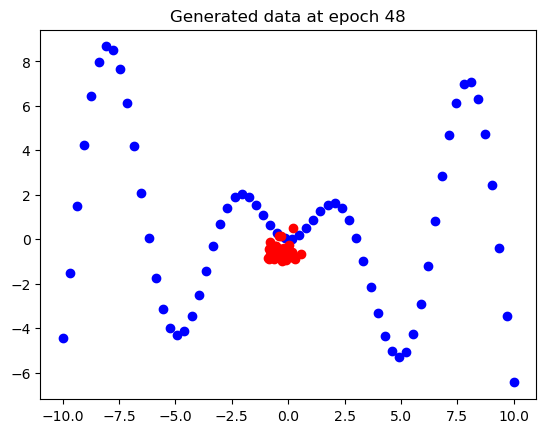

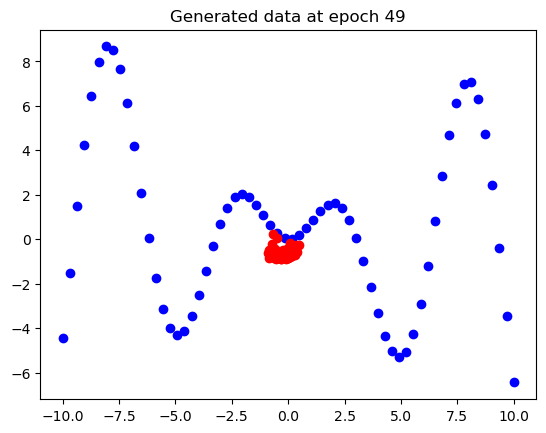

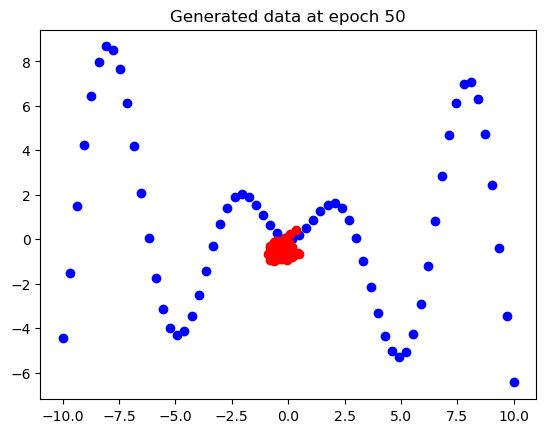

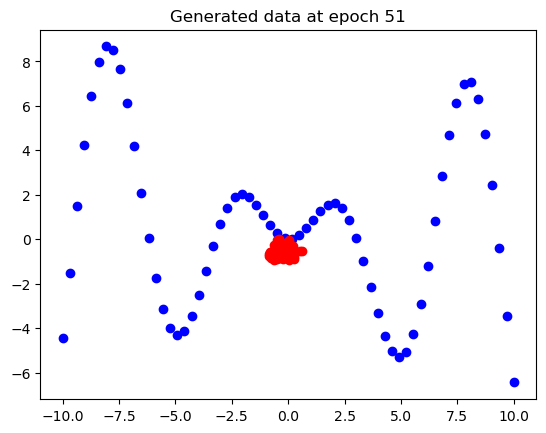

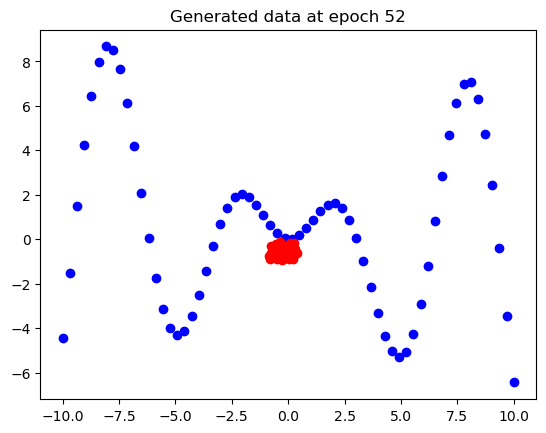

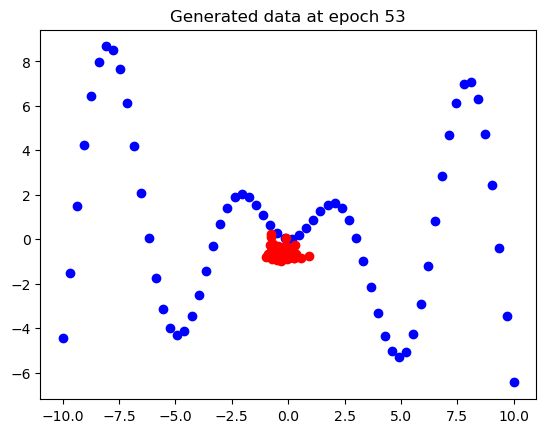

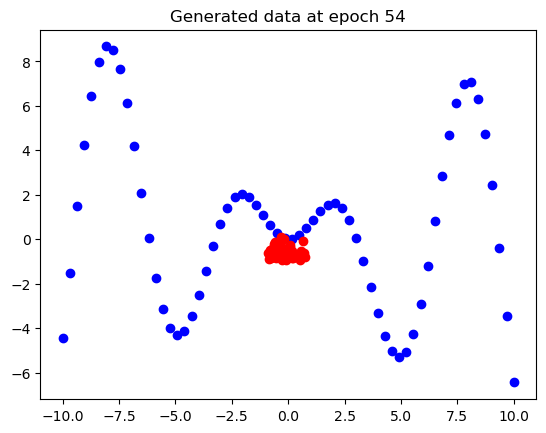

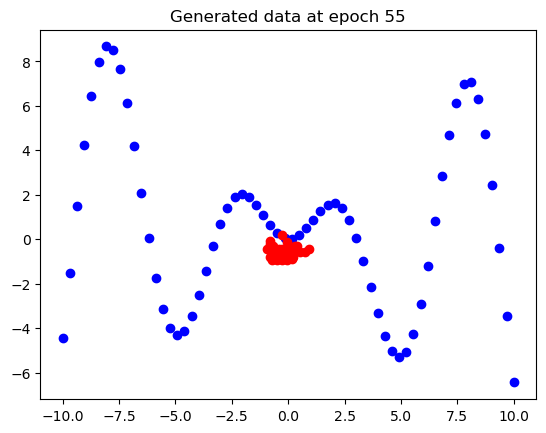

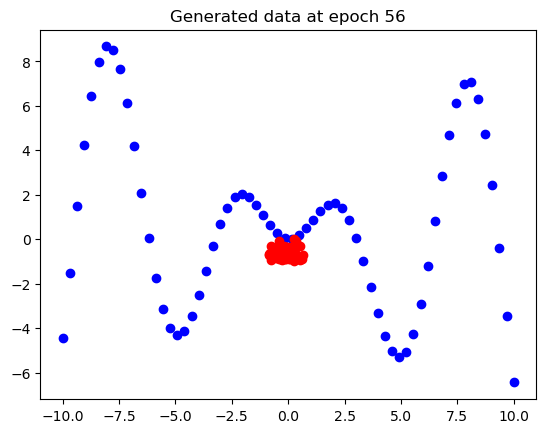

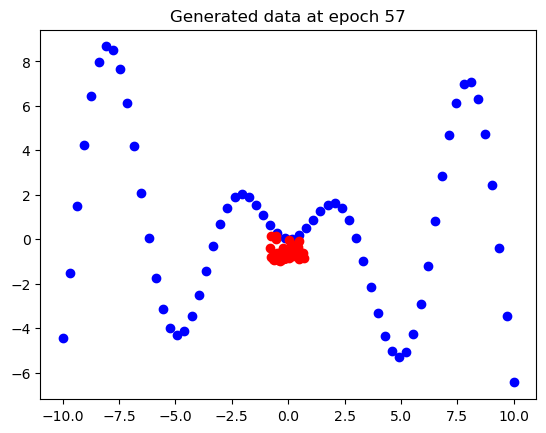

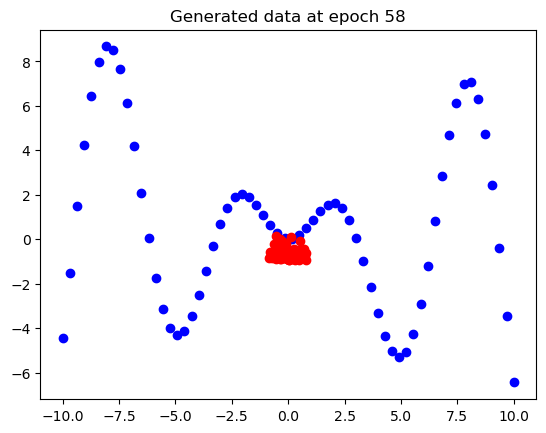

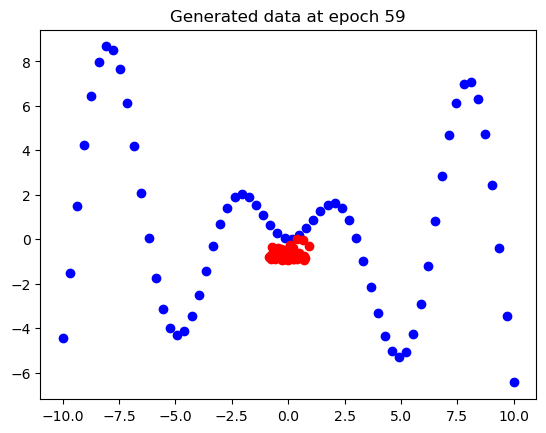

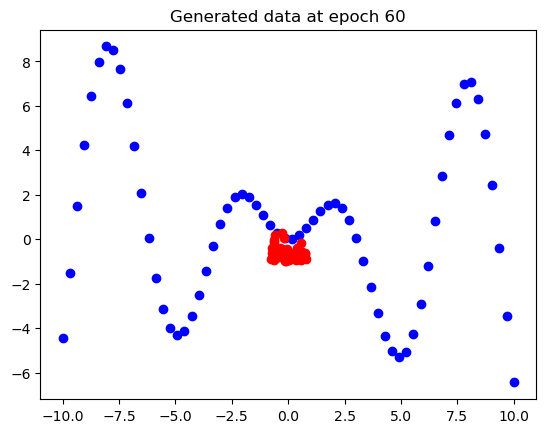

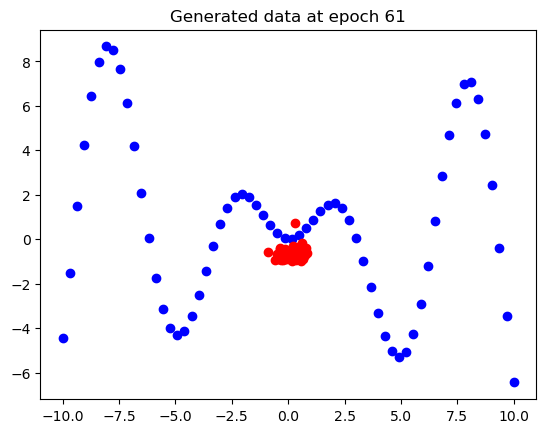

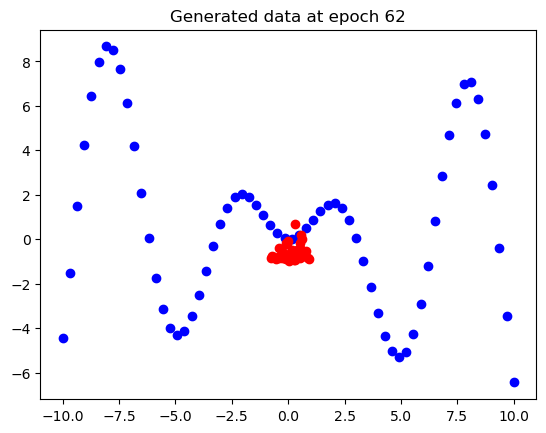

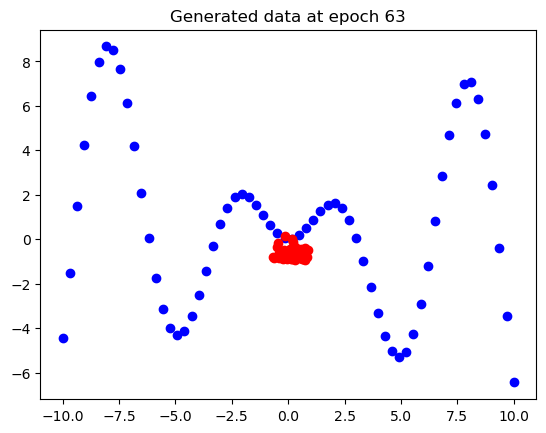

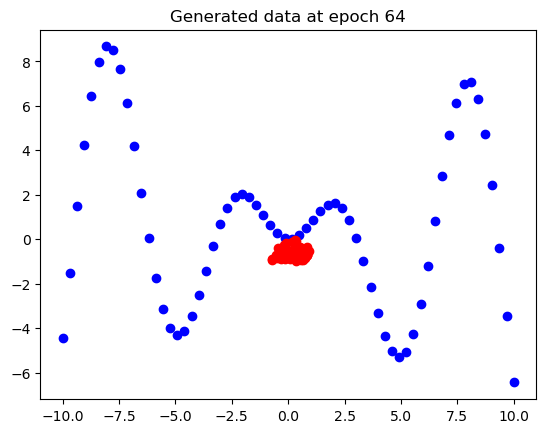

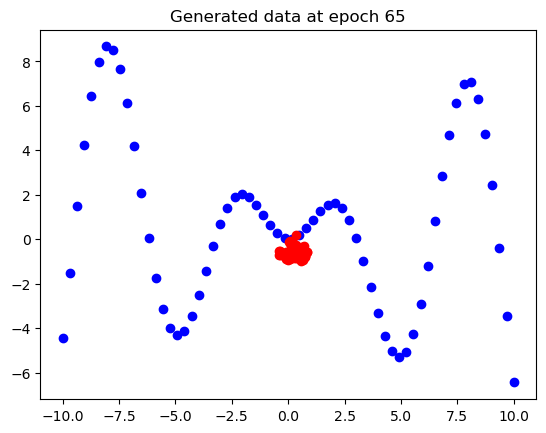

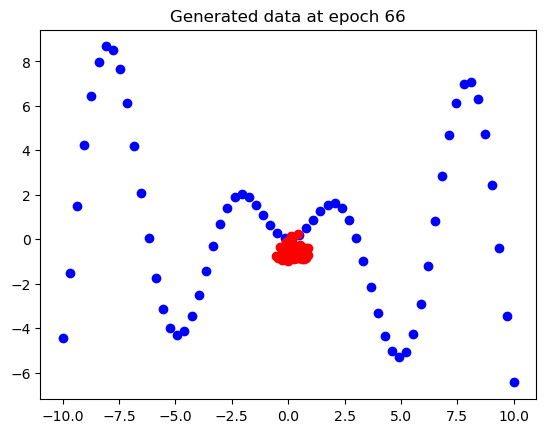

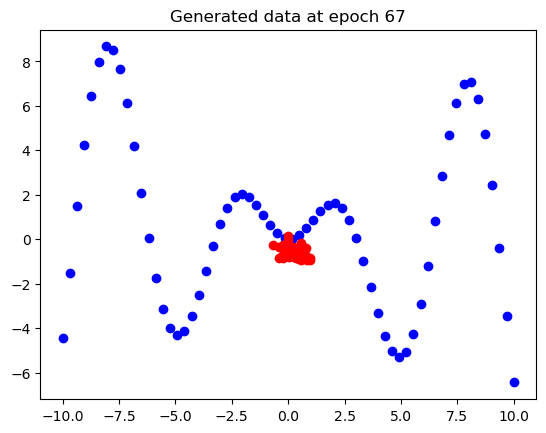

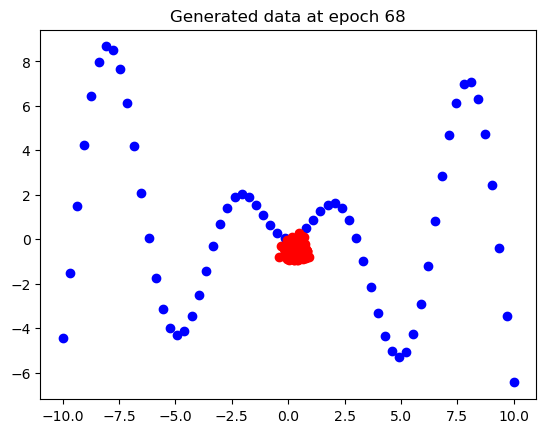

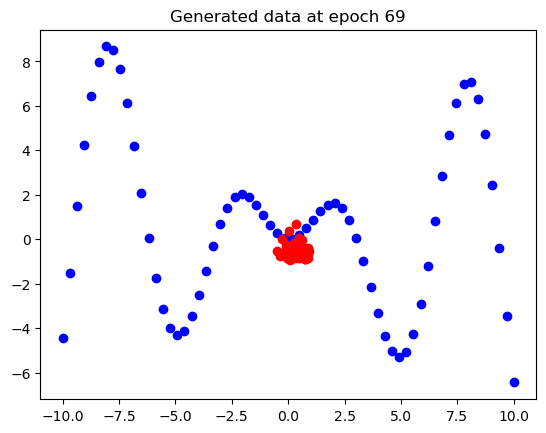

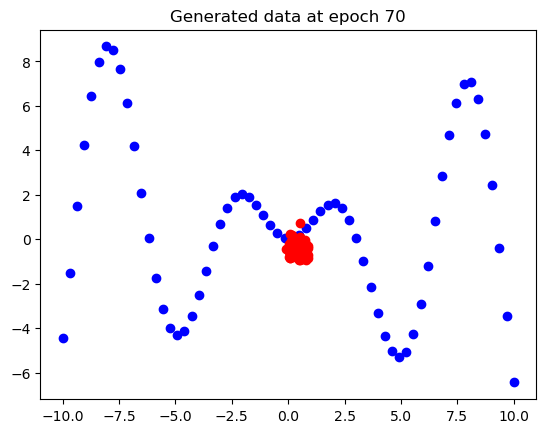

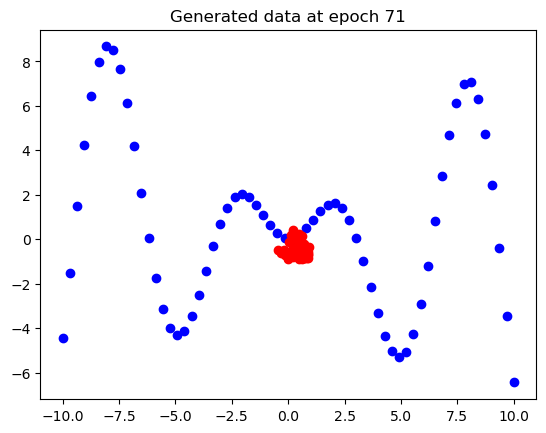

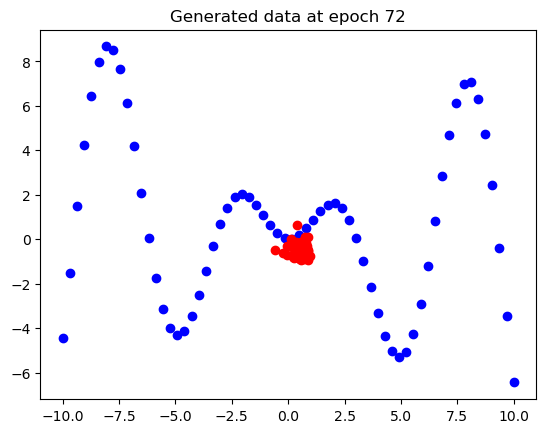

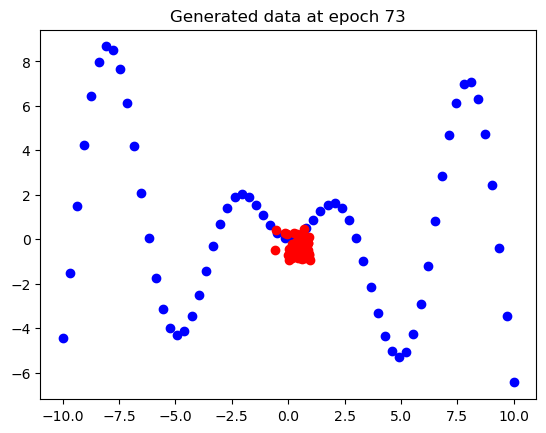

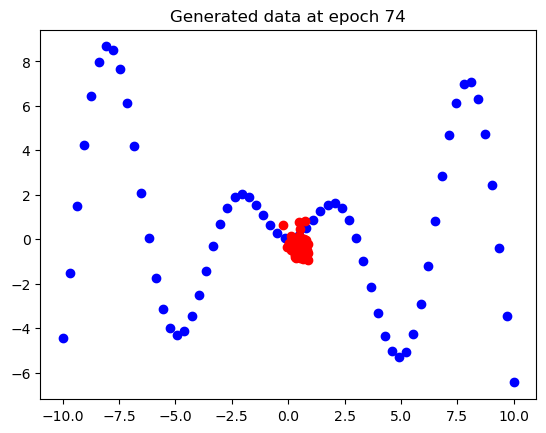

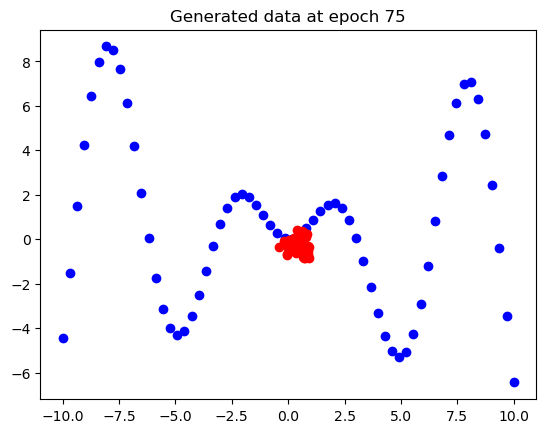

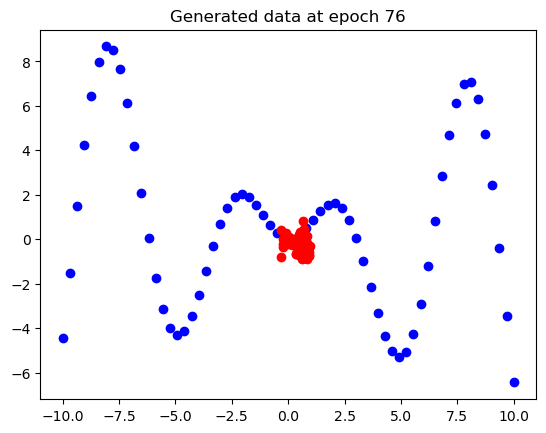

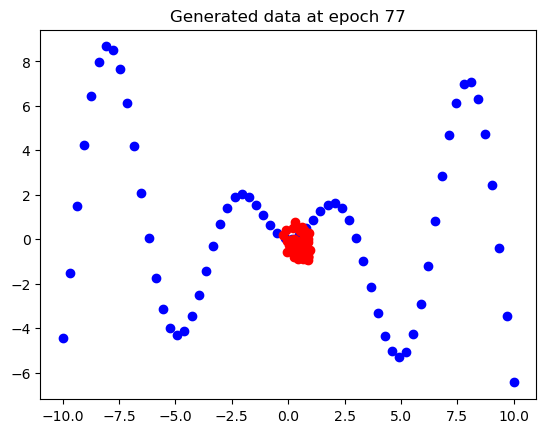

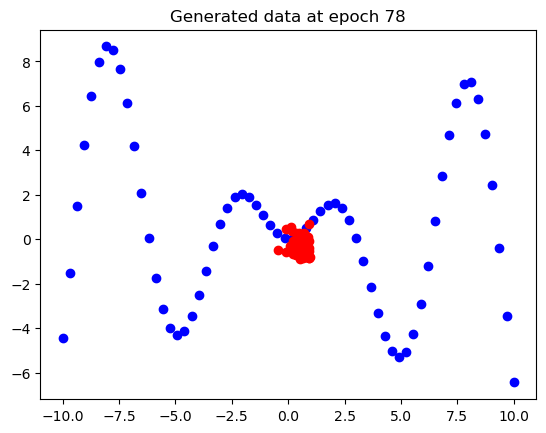

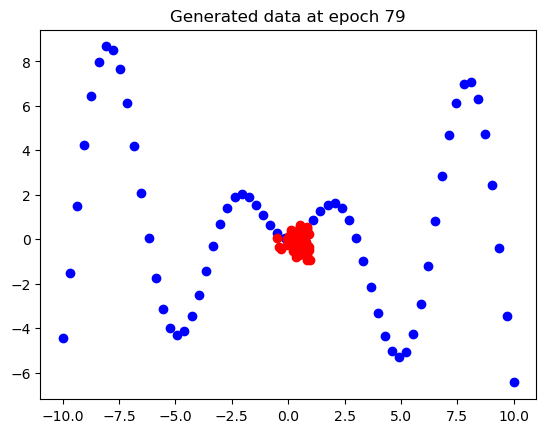

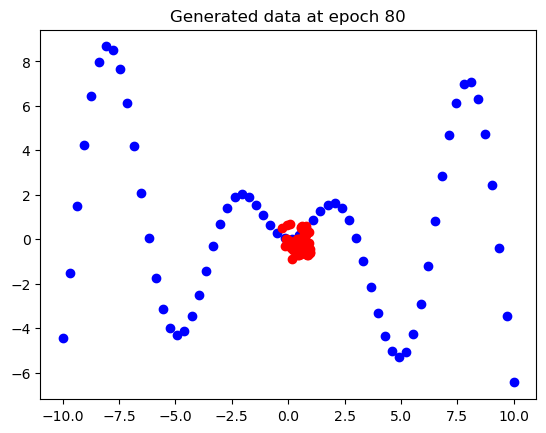

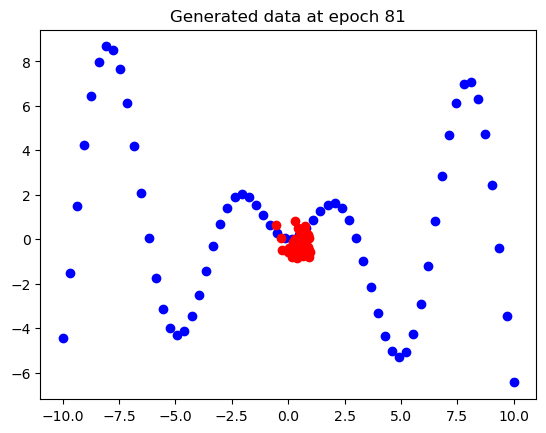

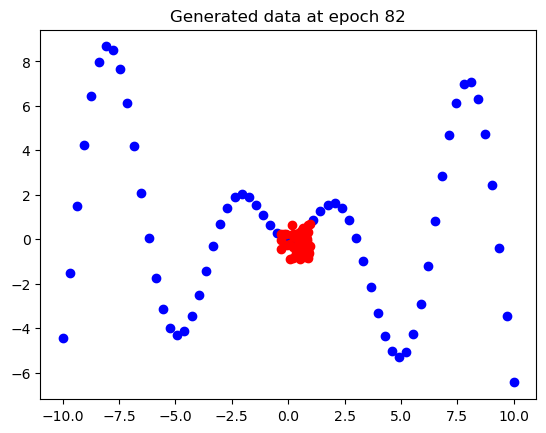

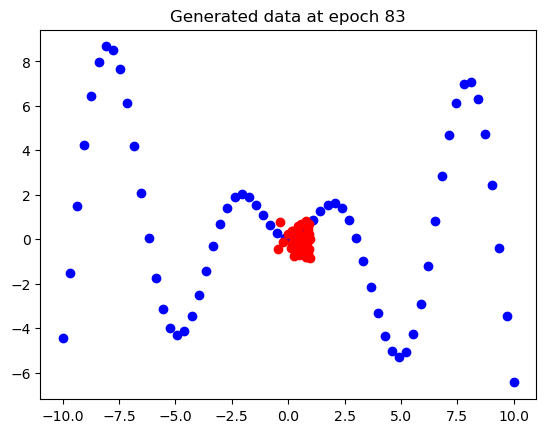

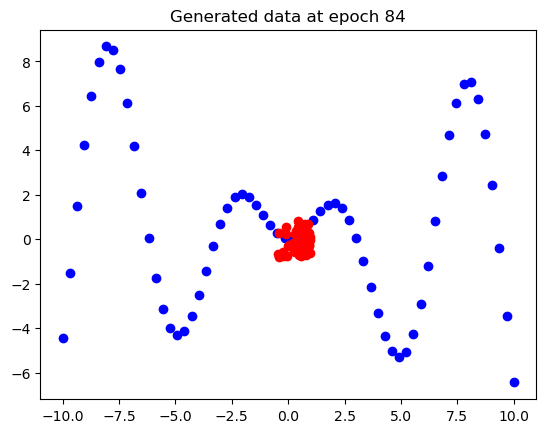

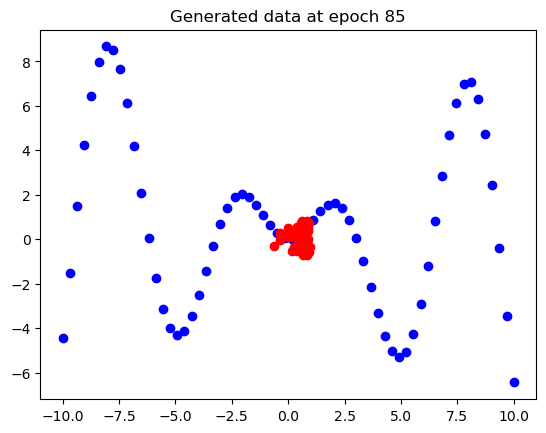

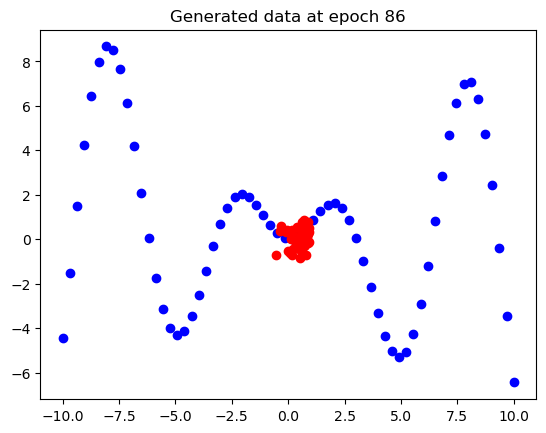

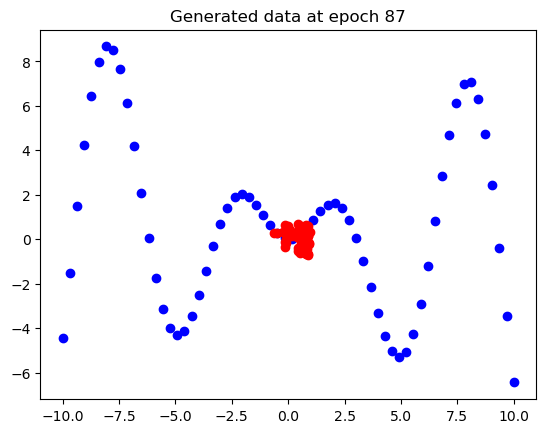

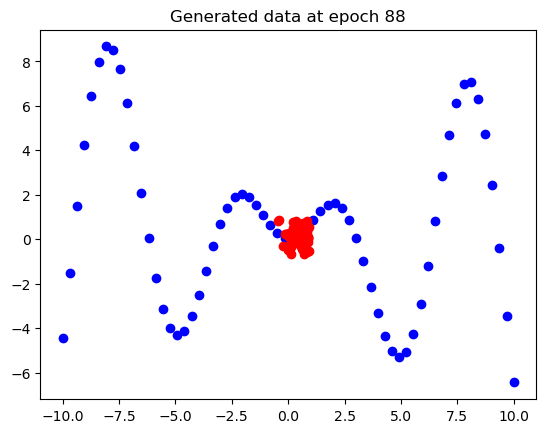

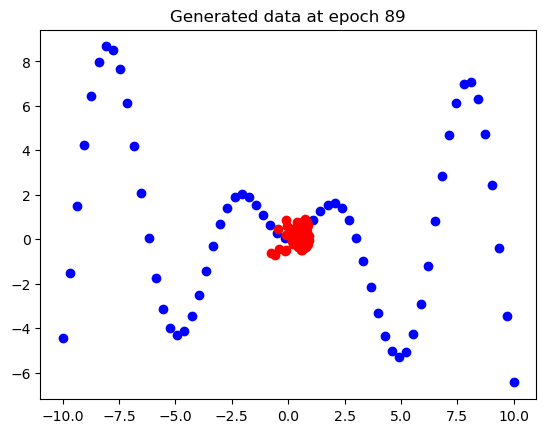

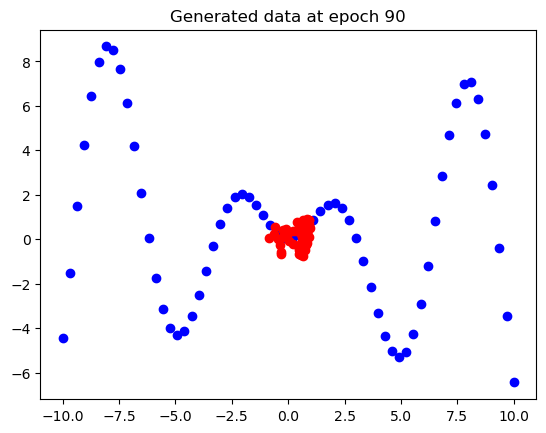

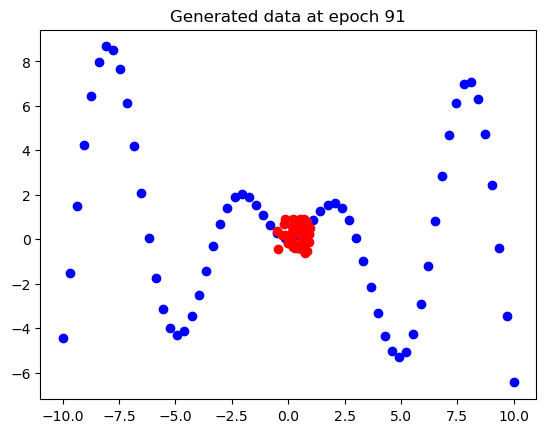

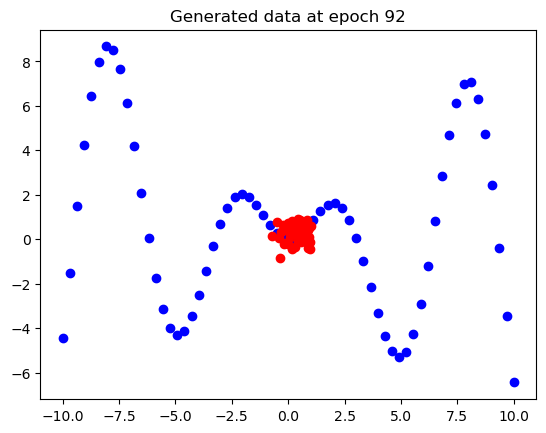

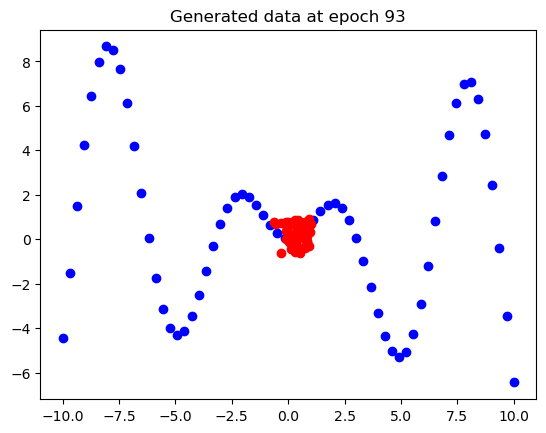

KeyboardInterrupt: 

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Функция, генерирующая настоящие данные
def generate_real_samples(n):
    x = torch.linspace(-10, 10, n).view(-1, 1)
    y = torch.sin(x)*x - x/10
    return torch.cat((x, y), dim=1)

# Гиперпараметры
latent_dim = 100
img_shape = (2,)
lr = 0.0002
b1 = 0.5
b2 = 0.999
batch_size = 64
n_epochs = 1000
sample_interval = 1000

# Генератор
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 2),
            nn.Tanh(),
        )

    def forward(self, z):
        img = self.model(z)
        return img

# Дискриминатор
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(2, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, img):
        validity = self.model(img)
        return validity

# Определение функций потерь и оптимизаторов
adversarial_loss = nn.BCELoss()
generator = Generator()
discriminator = Discriminator()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

# Обучение модели
for epoch in range(n_epochs):
    # Генерирование настоящих данных
    real_samples = generate_real_samples(batch_size)
    real_labels = torch.ones((batch_size, 1))
    fake_labels = torch.zeros((batch_size, 1))
    
    # Генерирование фейковых данных
    z = torch.randn(batch_size, latent_dim)
    fake_samples = generator(z)

    # Тренировка дискриминатора
    optimizer_D.zero_grad()
    d_real_loss = adversarial_loss(discriminator(real_samples), real_labels)
    d_fake_loss = adversarial_loss(discriminator(fake_samples.detach()), fake_labels)
    d_loss = (d_real_loss + d_fake_loss) / 2
    d_loss.backward()
    optimizer_D.step()

    # Тренировка генератора
    optimizer_G.zero_grad()
    g_loss = adversarial_loss(discriminator(fake_samples), real_labels)
    g_loss.backward()
    optimizer_G.step()

    # Вывод промежуточной информации о процессе обучения
    if epoch % sample_interval == 0:
        print("[Epoch %d/%d] [D loss: %f] [G loss: %f]" % (epoch, n_epochs, d_loss.item(), g_loss.item()))

    # Визуализация результатов
    plt.scatter(real_samples[:,0], real_samples[:,1], color='blue')
    plt.scatter(fake_samples[:,0].detach().numpy(), fake_samples[:,1].detach().numpy(), color='red')
    plt.title("Generated data at epoch %d" % epoch)
    plt.show()



Хрень какая то...Ну и кто тут победитель?